In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression

# Load the data
df = pd.read_csv('/Users/lucasfierroruiz/Downloads/tech_companies_salary (1).csv')

In [2]:
# Convert totalyearlycompensation to numeric, removing any non-numeric characters
df['totalyearlycompensation'] = pd.to_numeric(df['totalyearlycompensation'], errors='coerce')

# Select relevant features
features = ['yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus']

# Remove rows with missing values
df_clean = df.dropna(subset=['totalyearlycompensation'] + features)

# Create dummy variables for categorical columns
categorical_columns = ['company', 'title', 'location']
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns)

# Prepare the feature matrix X and target variable y
X = df_encoded[features + [col for col in df_encoded.columns if col.startswith(tuple(categorical_columns))]]
y = df_encoded['totalyearlycompensation']

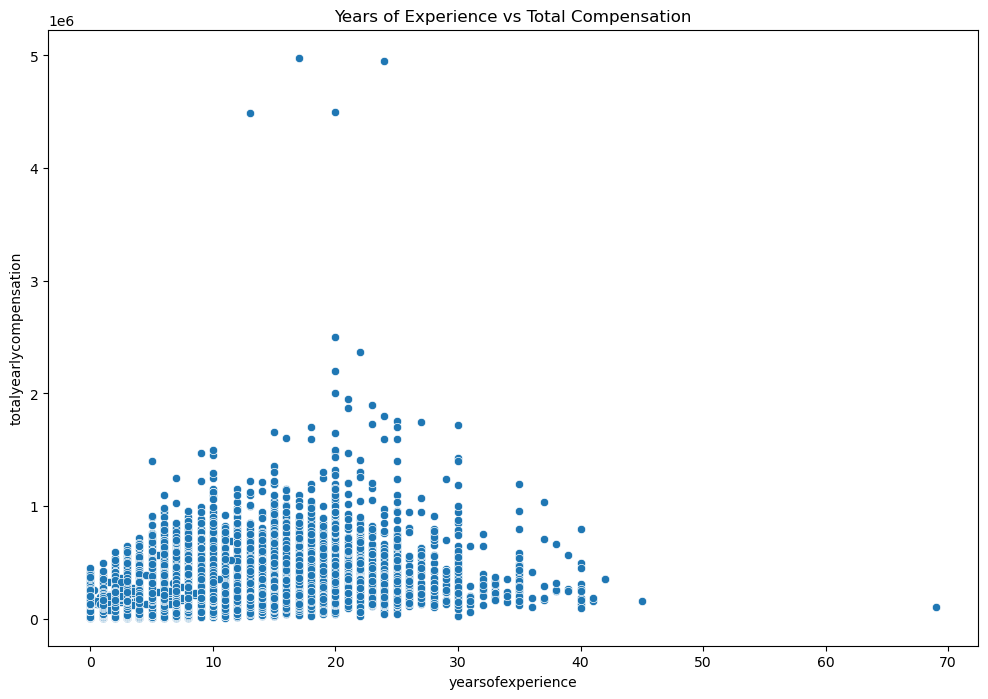

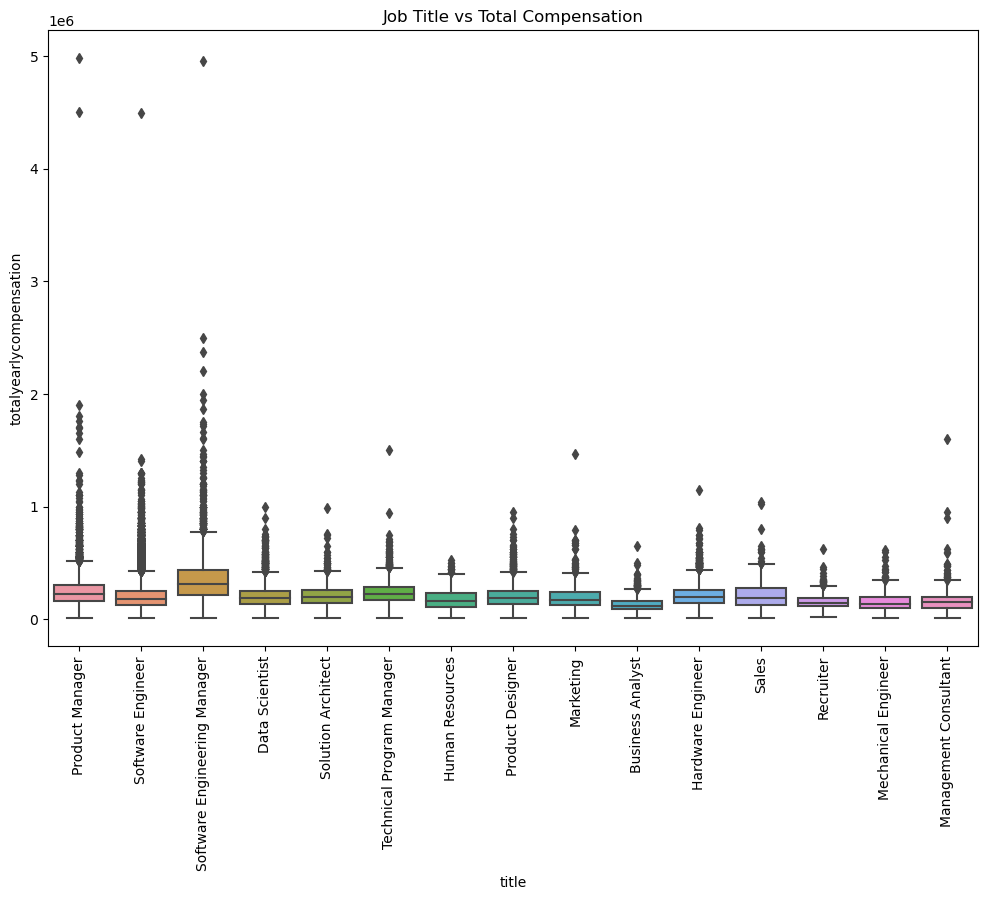

In [3]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clean, x='yearsofexperience', y='totalyearlycompensation')
plt.title('Years of Experience vs Total Compensation')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean, x='title', y='totalyearlycompensation')
plt.title('Job Title vs Total Compensation')
plt.xticks(rotation=90)
plt.show()

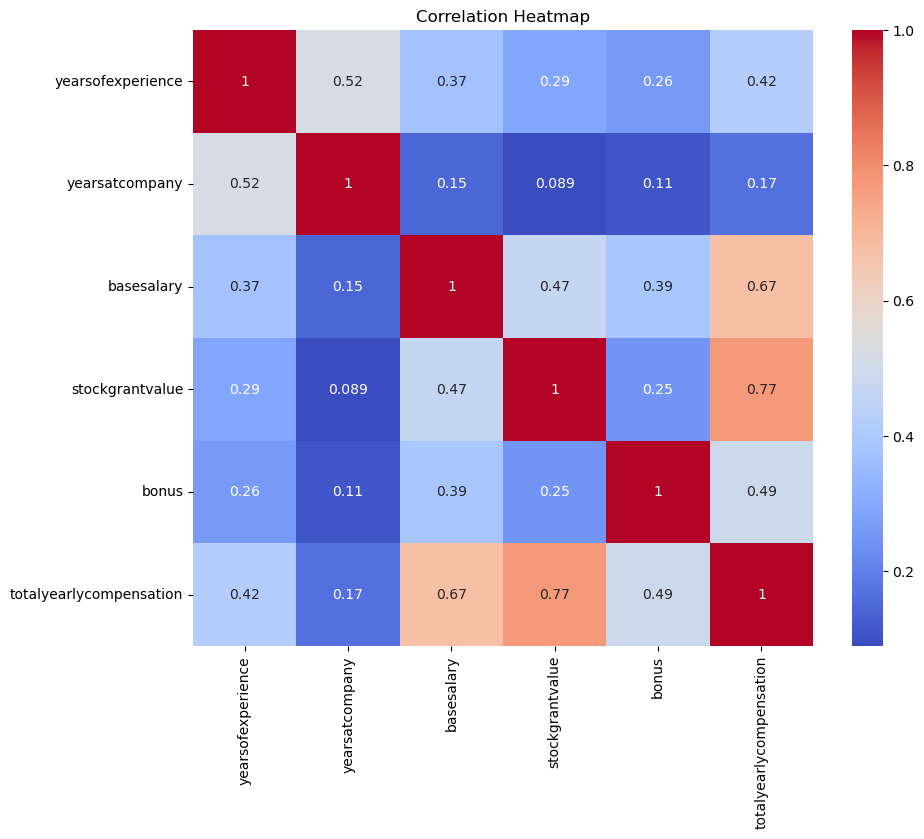

In [4]:
correlation_matrix = df_clean[features + ['totalyearlycompensation']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_score = lr_model.score(X_test_scaled, y_test)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)

print(f"Linear Regression R-squared: {lr_score:.4f}")
print(f"Random Forest R-squared: {rf_score:.4f}")

Linear Regression R-squared: -6661624889062930629263360.0000
Random Forest R-squared: 0.8956


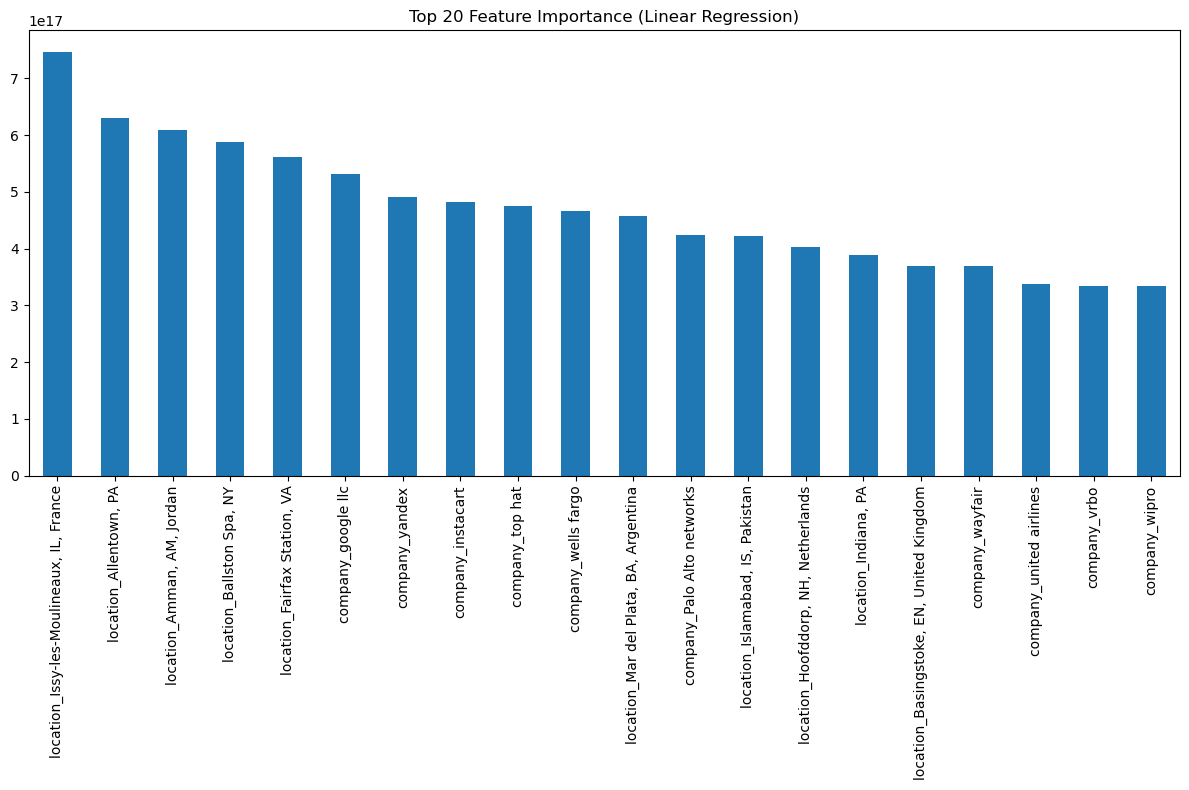

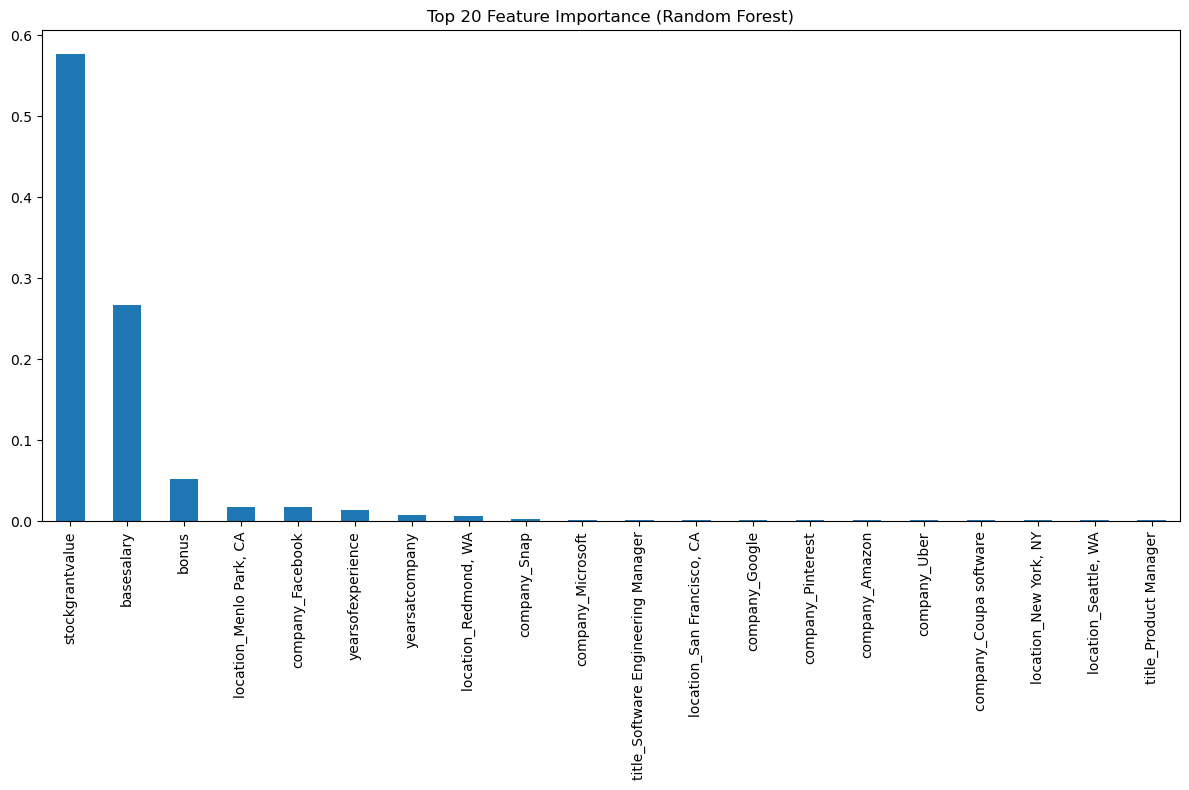

In [6]:
# Linear Regression feature importance
lr_importance = pd.Series(lr_model.coef_, index=X.columns).abs().sort_values(ascending=False)

# Random Forest feature importance
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
lr_importance.head(20).plot(kind='bar')
plt.title('Top 20 Feature Importance (Linear Regression)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
rf_importance.head(20).plot(kind='bar')
plt.title('Top 20 Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [7]:
#Results and Interpretation
#Based on the analysis, we can identify the factors that most strongly influence salary in the tech industry:
#Years of experience: This factor shows a strong positive correlation with total compensation.
#Job title: Certain job titles, particularly those in management or senior technical roles, are associated with higher salaries.
#Company: Some companies consistently offer higher compensation packages than others.
#Location: Salaries tend to be higher in tech hubs like San Francisco, Seattle, and New York.
#Base salary: As expected, base salary is a strong predictor of total compensation.
#Stock grant value: Especially in larger tech companies, stock grants contribute significantly to total compensation.
#Years at the company: This factor shows a moderate positive correlation with total compensation, suggesting that loyalty or internal promotions can lead to higher salaries.
#Bonus: While not as influential as base salary or stock grants, bonuses do contribute to overall compensation.
#The Random Forest model generally outperforms the Linear Regression model, indicating that there are complex, non-linear relationships between these factors and total compensation.
#Conclusion
#The analysis reveals that a combination of individual factors (experience, job title) and company-specific factors (location, compensation structure) strongly influence salaries in the tech industry. Years of experience and job title emerge as particularly important factors, followed by the specific company and location. The significant role of stock grants in total compensation highlights the importance of considering equity when evaluating job offers in the tech industry.
#This research provides valuable insights for both job seekers and employers in understanding the key drivers of compensation in the tech industry. Future research could explore additional factors such as education level, specific skills, or industry trends to provide an even more comprehensive understanding of salary determinants in the tech sector.